<a href="https://colab.research.google.com/github/lucaslopez411-bot/Data-Science-I/blob/main/ProyectoDS_ParteI_Lopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Primera Entrega - Visualizaciones en Python
##  📌 Abstract
---
Este proyecto utiliza un dataset de ventas que recopila información detallada sobre transacciones comerciales, incluyendo variables como producto, método de pago, tipo de cliente, región, método de envío, estado del pedido, marca del producto, precio total, cantidad de productos, descuentos aplicados, número de pedidos, monto total pagado, tiempo de envío y valor del envío.

El objetivo del proyecto es analizar el comportamiento de las ventas desde una perspectiva descriptiva y visual, con el fin de responder preguntas clave sobre los patrones de consumo, la distribución geográfica, las diferencias entre clientes nuevos y recurrentes, así como el impacto de los métodos de pago, envío y descuentos en las transacciones. Para ello, se aplican técnicas de análisis univariado, bivariado y multivariado, utilizando herramientas como pandas, Matplotlib y Seaborn.

Se comienza con un proceso de limpieza y validación de los datos, identificando y gestionando valores faltantes o inconsistentes. Posteriormente, se desarrollan visualizaciones que permiten explorar la evolución de las ventas, la composición del ticket promedio, el desempeño de las marcas y la eficiencia de los métodos de envío. Este análisis exploratorio constituye una base sólida para futuros trabajos orientados a la predicción de demanda, la segmentación de clientes y la optimización de estrategias comerciales.

---

##❓ Preguntas / Hipótesis de interés

1. ¿Qué marcas concentran la mayor cantidad de pedidos?
2. ¿Hay variación en el valor promedio del envío según la región?
3. ¿Cuál es el método de pago más frecuente en los clientes?
4. ¿Varía la cantidad de productos pedidos por tipo de cliente?


## ⭐ Objetivo del Proyecto

El objetivo de este proyecto es desarrollar un modelo predictivo que estime la evolución del nivel de ventas a partir de variables relevantes del negocio, como tipo de producto, marca, perfil de cliente, método de pago, descuentos y región. Este modelo no solo permitirá anticipar tendencias de consumo y cambios en la demanda, sino también identificar los factores con mayor impacto en las ventas. Los resultados facilitarán la toma de decisiones estratégicas orientadas a optimizar la planificación comercial, la gestión de inventarios y la eficiencia logística, contribuyendo a una mejor asignación de recursos y a la maximización de ingresos.

## 📊 Visualizaciones y Análisis

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df_ventas_dic_2024 = pd.read_csv("https://raw.githubusercontent.com/lucaslopez411-bot/Data-Science-I/refs/heads/main/194%20-%20VENTAS%20-%20registros_ventas_comercio_online_diciembre_2024.csv")
df_ventas_dic_2024.head()

,Fecha,Producto,Metodo de pago,Tipo de Cliente,Region,Metodo de Envio,Estado del Pedido,Marca,Precio Total (ARS),Cantidad de Productos,Descuento Aplicado (%),Cantidad de Pedidos,Monto Pagado (ARS),Tiempo de Envio,Valor del Envio (ARS)
0,1/12/2024,Laptop,Transferencia Bancaria,Recurrente,Cordoba,Envio Estandar,Cancelado,Samsung,449598,2,5.0,5,4368086,5,4829
1,1/12/2024,Tablet,NaN,Nuevo,Tucuman,Recogida en Tienda,Entregado,Xiaomi,104909,3,1.0,2,583345,2,6524
2,1/12/2024,Accesorios,Mercado Pago,Nuevo,Cordoba,Envio Express,Entregado,Sony,934866,3,9.0,10,24793675,2,2431
3,1/12/2024,Camara Digital,PayPal,Nuevo,Neuquen,Recogida en Tienda,Entregado,Sony,165242,1,8.0,8,1170342,2,8284
4,1/12/2024,Smartphone,Tarjeta de Credito,Recurrente,Neuquen,Recogida en Tienda,Entregado,Apple,209309,2,5.0,12,4644290,3,7572


In [72]:

missing_values = df_ventas_dic_2024.isna().sum().sort_values(ascending=False)
missing_values[missing_values > 0]



,0
Metodo de pago,65
Metodo de Envio,7
Descuento Aplicado (%),7


In [69]:
porcentaje_valores_faltantes = (df_ventas_dic_2024.isna().sum() / df_ventas_dic_2024.shape[0]) * 100
porcentaje_valores_faltantes[porcentaje_valores_faltantes > 0]

,0
Metodo de pago,2.601040
Metodo de Envio,0.280112
Descuento Aplicado (%),0.280112


Podemos ver que los valores faltantes son: 65 en "Metodo de pago", 7 en "Metodo de Envio" y 7 en "Descuento Aplicado (%). En porcentaje 2,60% en el primer columna y 0.28% en las otras 2 restantes.

## 📈 1. Análisis Bivariado

Marcas con mayor cantidad de pedidos.

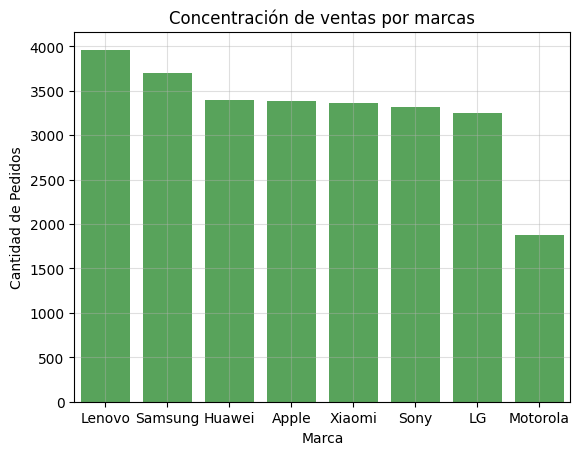

In [3]:
pedidos_por_marca = df_ventas_dic_2024.groupby("Marca")["Cantidad de Pedidos"].sum().reset_index()

sns.barplot(x="Marca", y= "Cantidad de Pedidos",data=pedidos_por_marca, order = pedidos_por_marca.sort_values("Cantidad de Pedidos", ascending=False)["Marca"], color="#4CAF50")
plt.title('Concentración de ventas por marcas')
plt.grid(True, alpha =0.4)
plt.show()

## Variación en el valor del envío según la región.

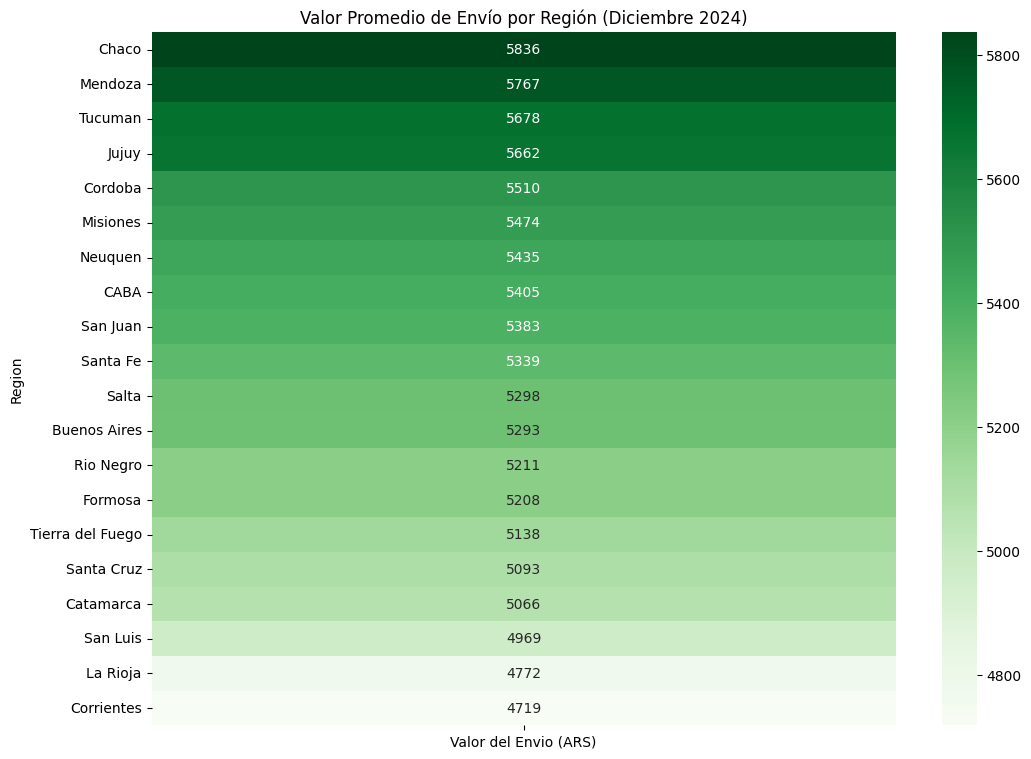

In [70]:
envio_por_region = df_ventas_dic_2024.pivot_table(values='Valor del Envio (ARS)', index='Region', aggfunc='mean')

plt.figure(figsize=(12, 9))
sns.heatmap(envio_por_region.loc[envio_por_region.sum(axis=1).sort_values(ascending=False).index], annot=True, fmt='.0f', cmap='Greens')
plt.title('Valor Promedio de Envío por Región (Diciembre 2024)')
plt.show()

Método de pago más frecuente.

In [12]:
colores_claros = ['#7CDE6D', '#23DE8E', '#33a02c', '#b2df8a', '#17becf','#1f78b4']

fig = px.pie(df_ventas_dic_2024, names='Metodo de pago', title='Proporción de Medios de pago por Cliente', hole=0.2, color_discrete_sequence=colores_claros)
fig.show()

## 📈 2. Análisis Multivariado

Distribución entre productos pedidos por cliente.

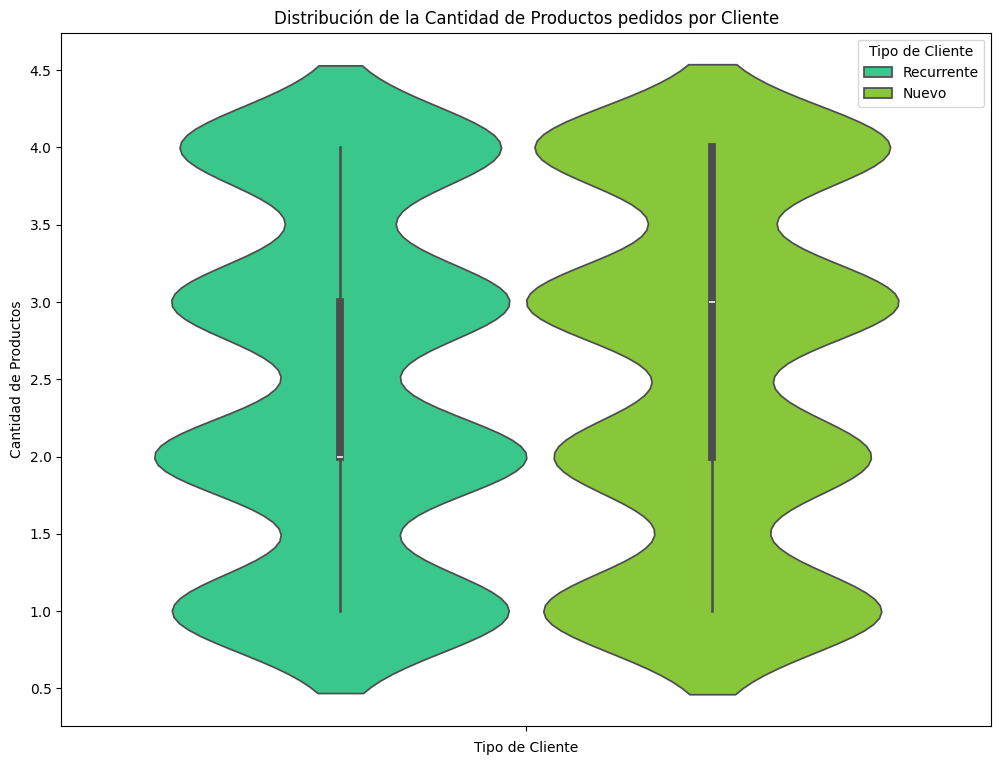

In [71]:
plt.figure(figsize=(12,9))
sns.violinplot(hue="Tipo de Cliente", y="Cantidad de Productos", data=df_ventas_dic_2024, inner="box", palette=['#23DE8E','#8ADE23'])

plt.title("Distribución de la Cantidad de Productos pedidos por Cliente")
plt.xlabel("Tipo de Cliente")
plt.ylabel("Cantidad de Productos")
plt.show()

## ✅ Conclusiones preliminares


1.   Las marcas con mayor cantidad de ventas son Lenovo, Samsung y Huawei.
2.   Si, existe variación en el valor promedio del envío según la región (ejemplo: Es más caro enviar a Chaco que a Corrientes)
3.   Los métodos de pagos tienen una distribución similar en porcentaje, levemente superior el uso de Mercado Pago.
4.   Se puede observar que la cantidad de productos pedidos por clientes nuevos, es un poco mayor a la de clientes recurrentes.


## 🎈 Acciones que podria realizar para mi dataset

Podriamos imputar valores faltantes razonables, lo cual haremos a continuación, ya que el % de impacto en la cantidad de datos es relativamente baja.

In [75]:
# Impución
df_ventas_dic_2024['Metodo de Envio'].fillna('Desconocido', inplace=True)
df_ventas_dic_2024['Metodo de pago'].fillna('Desconocido', inplace=True)
df_ventas_dic_2024['Descuento Aplicado (%)'].fillna(df_ventas_dic_2024['Descuento Aplicado (%)'].median())

,Descuento Aplicado (%)
0,5.0
1,1.0
2,9.0
3,8.0
4,5.0
...,...
2494,4.0
2495,11.0
2496,9.0
2497,9.0


,Fecha,Producto,Metodo de pago,Tipo de Cliente,Region,Metodo de Envio,Estado del Pedido,Marca,Precio Total (ARS),Cantidad de Productos,Descuento Aplicado (%),Cantidad de Pedidos,Monto Pagado (ARS),Tiempo de Envio,Valor del Envio (ARS)
0,1/12/2024,Laptop,Transferencia Bancaria,Recurrente,Cordoba,Envio Estandar,Cancelado,Samsung,449598,2,5.0,5,4368086,5,4829
1,1/12/2024,Tablet,Desconocido,Nuevo,Tucuman,Recogida en Tienda,Entregado,Xiaomi,104909,3,1.0,2,583345,2,6524
2,1/12/2024,Accesorios,Mercado Pago,Nuevo,Cordoba,Envio Express,Entregado,Sony,934866,3,9.0,10,24793675,2,2431
3,1/12/2024,Camara Digital,PayPal,Nuevo,Neuquen,Recogida en Tienda,Entregado,Sony,165242,1,8.0,8,1170342,2,8284
4,1/12/2024,Smartphone,Tarjeta de Credito,Recurrente,Neuquen,Recogida en Tienda,Entregado,Apple,209309,2,5.0,12,4644290,3,7572
